In [37]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
from PIL import Image # For handling the images
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Embedding
from keras.layers import Conv2D, MaxPooling2D,TimeDistributed
from keras.layers import Dropout
import keras.optimizers


In [126]:
lookup_gesture = dict()
reverselookup_gesture = dict()
lookup_seq = dict()
reverselookup_seq = dict()

seqLens=[]
count = 0
count_seq = 0
for i in range(0,12):
    
    for j in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # If running this code locally, this is to ensure you aren't reading in hidden folders
                for k in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+
                                           '/sequences/' + j + '/' + 'train' + '/'):
                    imgseq = 0
                    for l in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+
                                    '/sequences/' + j + '/' + 'train' + '/' + k + '/'):
                            imgseq= imgseq +1
                    seqLens.append(imgseq)
                   
                   # print(i,j,k,imgseq)
                         
                    
count_seq
Seqlength=np.int(np.percentile(seqLens,95))
Seqlength

25

In [244]:
x_train = []
x_train1=[]
X_train =[]
y_train = []
final_img_count_train = 0
seq = 0
ges_img_count = 0
sub_img_count = 0
img_count = 0
blended_image = Image.new('L',(320,120),"black")
for i in range(0, 4): # select 2 subject areas only
    ges_img_count = 0
    for j in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # Again avoid hidden folders
              
            for k in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                  + j + '/' + 'train' + '/'):
               
                if not k.startswith('.'): # Again avoid hidden folders
                    img_count = 0
                    x_train.clear()
                    for l in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                          + j + '/' + 'train' + '/' + k + '/'):
                        img = Image.open('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                          + j + '/' + 'train' + '/' + k + '/' + l).convert('L')
                        # Read in and convert to greyscale
                        img = img.resize((320, 120))
                        arr = np.array(img)
                        x_train.append(arr) 
                        img_count = img_count + 1
                  
                    if img_count < (Seqlength):
                        for m in range (img_count , Seqlength):
                            arr=np.array(blended_image)
                            x_train.append(arr)
                           # m = m + 1
                        X_train.extend(x_train)
                        y_values = str(j)
                        y_train.append(y_values)

                    elif img_count >= Seqlength:
                        
                        X_train.extend(x_train[-Seqlength:])
                        y_values = str(j)
                        y_train.append(y_values) 
                       
X_train = np.array(X_train, dtype = 'float32')
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(32875, 120, 320)
(1315,)


In [245]:
encoder = LabelBinarizer()
y_train1 = encoder.fit_transform(y_train)
print(y_train1 )
print(y_train1.shape)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
(1315, 11)


In [246]:
x_test = []
X_test=[]
y_test = []
final_img_count_test = 0
seq_img_count  = 0
ges_img_count = 0
sub_img_count = 0
img_count = 0
for i in range(0,4): # select 2 subject areas only
    ges_img_count = 0
    for j in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # Again avoid hidden folders
            seq_img_count = 0 # To tally images of a given gesture
            for k in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                + j + '/' + 'test' + '/'):
                if not k.startswith('.'): # Again avoid hidden folders
                    x_test.clear()
                    img_count = 0
                    for l in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                        + j + '/' + 'test' + '/' + k + '/'):
                        img = Image.open('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                          + j + '/' + 'test' + '/' + k + '/' + l).convert('L')
                        # Read in and convert to greyscale
                        img = img.resize((320, 120))
                        arr = np.array(img)
                        x_test.append(arr) 
                        img_count = img_count + 1
                     
                    if img_count < (Seqlength):
                        for m in range (img_count , Seqlength):
                            arr=np.array(blended_image)
                            x_test.append(arr)
                           # m = m + 1
                        X_test.extend(x_test)
                        y_values = str(j)
                        y_test.append(y_values)
                    elif img_count >= Seqlength:
                        X_test.extend(x_test[-Seqlength:])
                        y_values = str(j)
                        y_test.append(y_values)
                    
X_test = np.array(X_test, dtype = 'float32')
y_test = np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(8200, 120, 320)
(328,)


In [247]:
encoder = LabelBinarizer()
y_test1 = encoder.fit_transform(y_test)
print(y_test1.shape)


(328, 11)


0


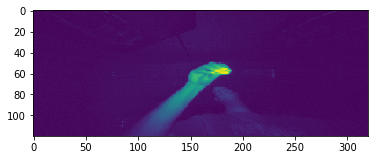

1


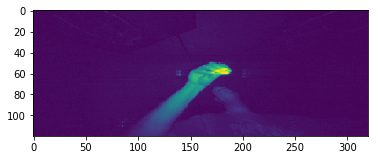

2


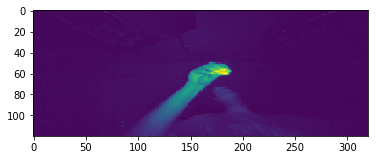

3


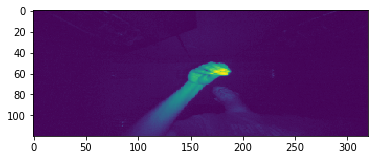

4


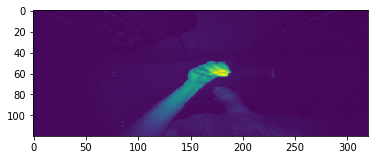

5


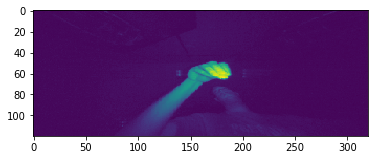

6


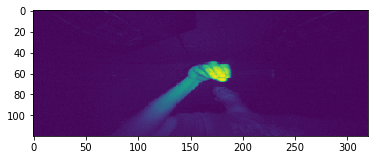

7


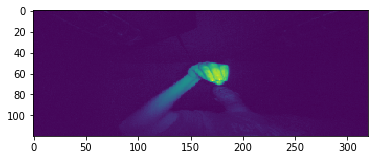

8


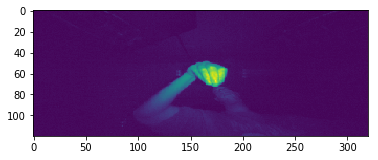

9


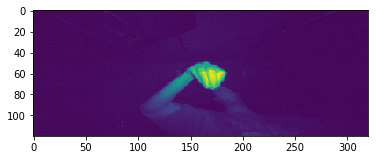

10


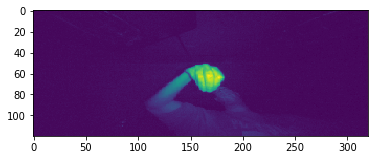

11


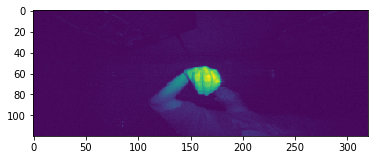

12


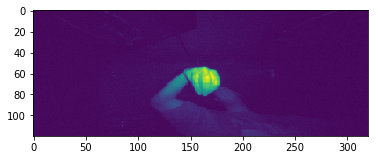

13


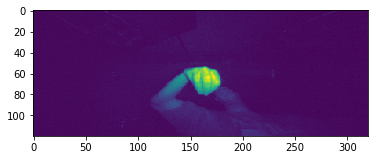

14


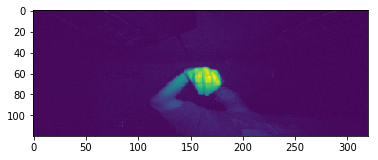

15


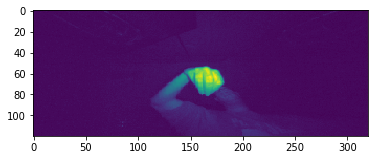

16


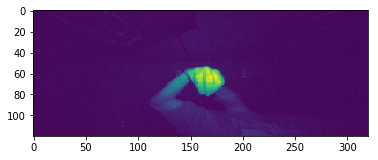

17


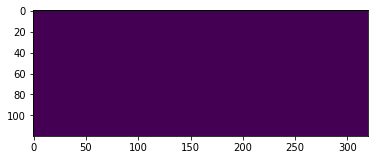

18


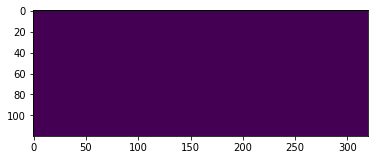

19


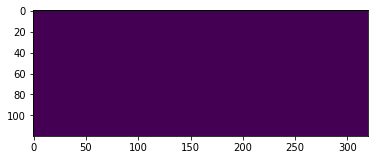

20


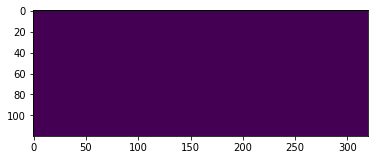

21


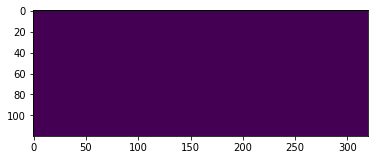

22


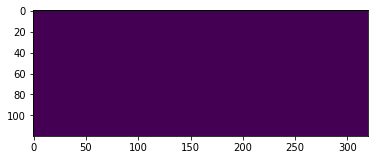

23


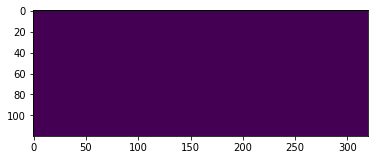

24


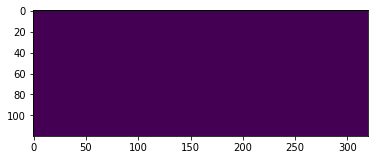

In [248]:
from random import randint

for i in range(0,25) :
    
        plt.imshow(X_train[i])
        print(i)
        plt.show()

In [249]:
X_train = X_train.reshape((y_train.shape[0],Seqlength,120, 320,1))
X_train /= 255
X_test = X_test.reshape((y_test.shape[0],Seqlength,120,320,1))
X_test /= 255
X_train.shape
X_test.shape
#y_train1 = y_train1.reshape(final_seq_count_train,Seqlength,11)
#y_train1.shape


(328, 25, 120, 320, 1)

In [250]:

cnn = Sequential()
cnn.add(Conv2D(1, (2,2), activation='relu', padding='same', input_shape=(120,320,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 120, 320, 1)       5         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 60, 160, 1)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 9600)              0         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [258]:
# define LSTM model
model = Sequential()
model.add(TimeDistributed(cnn, input_shape=(Seqlength,120,320,1)))
model.add(LSTM(Seqlength,return_sequences=True,input_shape=(Seqlength,120,320,1)))
model.add(LSTM(Seqlength))
#model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_21 (TimeDis (None, 25, 9600)          5         
_________________________________________________________________
lstm_33 (LSTM)               (None, 25, 25)            962600    
_________________________________________________________________
lstm_34 (LSTM)               (None, 25)                5100      
_________________________________________________________________
dense_20 (Dense)             (None, 11)                286       
Total params: 967,991
Trainable params: 967,991
Non-trainable params: 0
_________________________________________________________________


In [259]:
model.compile(optimizer= 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 

In [260]:
epochs =10


model.fit(X_train, y_train1, epochs=epochs, batch_size=Seqlength) #,validation_data =(x_test,y_test1))

Epoch 1/10
1315/1315 [==============================] - 138s 105ms/step - loss: 2.3791 - acc: 0.1316
Epoch 2/10
1315/1315 [==============================] - 133s 101ms/step - loss: 2.0237 - acc: 0.2989
Epoch 3/10
1315/1315 [==============================] - 136s 103ms/step - loss: 1.3956 - acc: 0.5384
Epoch 4/10
1315/1315 [==============================] - 138s 105ms/step - loss: 0.9791 - acc: 0.6875
Epoch 5/10
1315/1315 [==============================] - 146s 111ms/step - loss: 0.7461 - acc: 0.7681
Epoch 6/10
1315/1315 [==============================] - 143s 109ms/step - loss: 0.6073 - acc: 0.8106
Epoch 7/10
1315/1315 [==============================] - 147s 111ms/step - loss: 0.4627 - acc: 0.8631
Epoch 8/10
1315/1315 [==============================] - 149s 113ms/step - loss: 0.4505 - acc: 0.8639
Epoch 9/10
1315/1315 [==============================] - 151s 115ms/step - loss: 0.3465 - acc: 0.8867
Epoch 10/10
1315/1315 [==============================] - 154s 117ms/step - loss: 0.2554 - a

In [261]:
[loss, acc] = model.evaluate(X_test,y_test1,verbose=1)
print("Accuracy:" + str(acc) + ":" + "Loss:" + str(loss))

328/328 [==============================] - 24s 73ms/step
Accuracy:0.8353658536585366:Loss:0.41765119171724086


In [262]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred_test = model.predict_classes(X_test)
#print(y_pred_validate)

p = model.predict_proba(X_test) # to predict probability

target_names = ['cam_b','cam_f','cam_l','cam_r','down','ele','left','right','up','zoom_in','zoom_out']

print(classification_report(np.argmax(y_test1,axis=1), y_pred_test,target_names=target_names))
print(confusion_matrix(np.argmax(y_test1,axis=1), y_pred_test))


             precision    recall  f1-score   support

      cam_b       0.63      0.71      0.67        31
      cam_f       0.69      0.79      0.73        28
      cam_l       1.00      0.96      0.98        28
      cam_r       0.89      0.89      0.89        35
       down       0.81      1.00      0.90        30
        ele       1.00      0.88      0.94        33
       left       0.89      0.86      0.88        29
      right       0.68      0.79      0.73        29
         up       0.75      0.60      0.67        25
    zoom_in       0.96      0.77      0.86        31
   zoom_out       1.00      0.90      0.95        29

avg / total       0.85      0.84      0.84       328

[[22  7  0  2  0  0  0  0  0  0  0]
 [ 4 22  0  1  1  0  0  0  0  0  0]
 [ 0  1 27  0  0  0  0  0  0  0  0]
 [ 0  2  0 31  0  0  0  1  1  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0  2 29  1  0  0  1  0]
 [ 0  0  0  0  4  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  2 23  4  0  0]
 [ 0  0  0  0  0  0 